<a href="https://colab.research.google.com/github/aleksandr-del/gradient-boosting-from-scratch/blob/main/graident_boosting_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный бустинг для регрессии

Импортируем необходимые библиотеки, модули, функции:

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Датасет

[Создаем игрушечный датасет](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression):

In [2]:
X, y = make_regression(n_samples=1000, n_features=10)

Упакуем все в датафрейм:

In [3]:
df = pd.DataFrame(X)
df['y_true'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,-0.254475,-0.758590,1.555100,-1.277993,-0.085789,-0.276538,-0.103923,-0.015704,-1.339011,-0.596467,-253.471771
1,1.922980,-0.762984,1.594284,-0.051507,-2.144488,0.529371,2.989936,-0.248507,0.034008,-1.240809,-67.180753
2,0.533725,-0.159133,-1.422570,0.318753,0.676215,0.542988,-0.795867,-0.237169,-0.953369,0.063793,-22.114316
3,-0.621687,1.597682,-1.023580,-2.129012,-0.649626,0.553806,-1.008693,1.288557,-1.393622,0.513096,-58.755321
4,-0.678513,0.005648,-0.497487,1.010381,-0.072723,-1.220696,1.335769,-1.186937,0.551663,0.053671,-74.966597


## Бустинг

### Шаг 1

Инициализируем модель градиентного бустинга - делаем констатнтное предсказание для всех наблюдений (среднее значение по выборке является лучшим предсказанием, если наша функция потерь - сумма квадратов ошибки):

In [4]:
df['y_pred_0'] = df['y_true'].mean()

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,y_true,y_pred_0
0,-0.254475,-0.758590,1.555100,-1.277993,-0.085789,-0.276538,-0.103923,-0.015704,-1.339011,-0.596467,-253.471771,11.579303
1,1.922980,-0.762984,1.594284,-0.051507,-2.144488,0.529371,2.989936,-0.248507,0.034008,-1.240809,-67.180753,11.579303
2,0.533725,-0.159133,-1.422570,0.318753,0.676215,0.542988,-0.795867,-0.237169,-0.953369,0.063793,-22.114316,11.579303
3,-0.621687,1.597682,-1.023580,-2.129012,-0.649626,0.553806,-1.008693,1.288557,-1.393622,0.513096,-58.755321,11.579303
4,-0.678513,0.005648,-0.497487,1.010381,-0.072723,-1.220696,1.335769,-1.186937,0.551663,0.053671,-74.966597,11.579303


Посчитаем метрики качества модели:

In [6]:
print(f"R2: {r2_score(df['y_true'], df['y_pred_0'])}")
print(f"MSE: {mean_squared_error(df['y_true'], df['y_pred_0'])}")
print(f"MAE: {mean_absolute_error(df['y_true'], df['y_pred_0'])}")

R2: 0.0
MSE: 40879.94091266593
MAE: 162.5928262152452


### Шаг 2

Посчитаем остатки:

In [7]:
df['residuals_0'] = df['y_true'] - df['y_pred_0']
df.head()

,0,1,2,3,4,5,6,7,8,9,y_true,y_pred_0,residuals_0
0,-0.254475,-0.758590,1.555100,-1.277993,-0.085789,-0.276538,-0.103923,-0.015704,-1.339011,-0.596467,-253.471771,11.579303,-265.051074
1,1.922980,-0.762984,1.594284,-0.051507,-2.144488,0.529371,2.989936,-0.248507,0.034008,-1.240809,-67.180753,11.579303,-78.760056
2,0.533725,-0.159133,-1.422570,0.318753,0.676215,0.542988,-0.795867,-0.237169,-0.953369,0.063793,-22.114316,11.579303,-33.693619
3,-0.621687,1.597682,-1.023580,-2.129012,-0.649626,0.553806,-1.008693,1.288557,-1.393622,0.513096,-58.755321,11.579303,-70.334624
4,-0.678513,0.005648,-0.497487,1.010381,-0.072723,-1.220696,1.335769,-1.186937,0.551663,0.053671,-74.966597,11.579303,-86.545900


### Шаг 3

Инициализируем алгоритм Дерево решений с максимальной глубиной, равной 1 (stump), то есть листов у нас будет 2:

In [8]:
model_1 = DecisionTreeRegressor(max_leaf_nodes=2)

Обучаемся на остатках:

In [9]:
model_1.fit(df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], df['residuals_0'])

DecisionTreeRegressor(max_leaf_nodes=2)

Делаем новое предсказание, суммировав предсказанные алгоритмом остатки, умноженные на скорость обучения, и первое предсказание, другими словами, мы компенсируем остатки:

In [10]:
df['y_pred_1'] = model_1.predict(df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]) * 0.1 + df['y_pred_0']

Визуализируем дерево:

[Text(0.5, 0.75, 'X[7] <= 0.299\nsquared_error = 40879.941\nsamples = 1000\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 35354.898\nsamples = 593\nvalue = -65.096'),
 Text(0.75, 0.25, 'squared_error = 33760.202\nsamples = 407\nvalue = 94.845')]

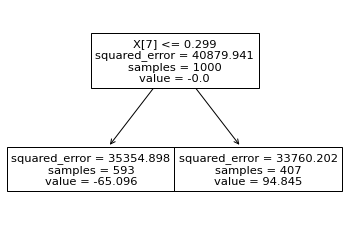

In [11]:
plot_tree(model_1)

Посчитаем метрики качества:

In [12]:
print(f"R2: {r2_score(df['y_true'], df['y_pred_1'])}")
print(f"MSE: {mean_squared_error(df['y_true'], df['y_pred_1'])}")
print(f"MAE: {mean_absolute_error(df['y_true'], df['y_pred_1'])}")

R2: 0.028695637820626452
MSE: 39706.86493410746
MAE: 160.20915902508773


### Шаг 4

Повторяем шаги 2, 3 до тех пор, пока не добьемся приемлемого качества или определенное количество деревьев. Создадим для этого новый класс.

Реализуем класс градиентного бустинга:

In [13]:
class MyGradientBoosting():
    def __init__(self, lr=0.01, iters=1000, max_depth=4):
        self.lr = lr
        self.iters = iters
        self.max_depth = max_depth
        self.models_ = None
        self.constant_prediction_ = None
        self.MAE_ = None

    def fit(self, X, y):
        X = X.values
        y = y.values
        prediction = np.full((y.shape), np.mean(y)) # инициализируем модель константным предсказанием: среднее значение таргета обучающей выборки
        models = [] # в этом списке будем хранить модели Решающего дерева
        MAE = [] # в этом списке будем хранить значение МАЕ каждой итерации

        for _ in range(self.iters):
            residual = y - prediction # считаем остатки
            model = DecisionTreeRegressor(max_depth=self.max_depth, random_state=130223) # инициализируем модель Решающего дерева
            model.fit(X, residual) # обучаемся на остатках
            prediction += model.predict(X) * self.lr # корректируем константное предсказание, компенсируя остатки
            models.append(model) # сохраняем модель в список моделей
            MAE.append(mean_absolute_error(y, prediction)) # сохраняем метрику МАЕ
           
        self.models_ = models
        self.constant_prediction_ = np.mean(y)
        self.MAE_ = MAE

    def predict(self, X):
        X = X.values
        prediction = np.full((X.shape[0]), self.constant_prediction_)

        for model in self.models_:
            prediction += model.predict(X) * self.lr
    
        return prediction   


Иницилизируем объект класса `MyGradientBoosting`:

In [14]:
mgb = MyGradientBoosting()

Обучим модель градиентного бустинга:

In [25]:
mgb.fit(df.loc[:, 0:9], df['y_true'])

Визуализуем, как улучшались метрика качества МАЕ с каждой последующей итерацией:

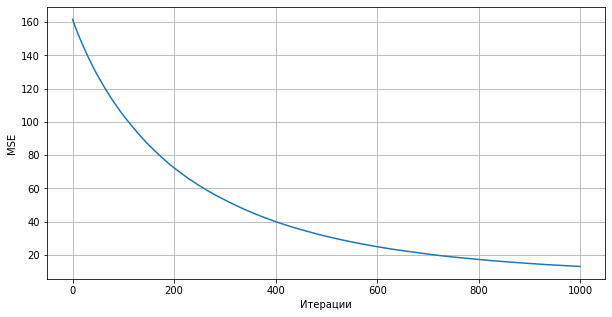

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(mgb.MAE_)
plt.grid(True)
plt.ylabel('МАЕ')
plt.xlabel('Итерации')
plt.show()

## Обучение и тестирование алгоритма `MyGradientBoosting`

Задача: предсказать длину плавника по массе тела и длине клюва

Загрузим датасет пингвинов:

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Start/Datasets/penguins.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Переведем признаки на русский язык:

In [33]:
df.columns = ['вид','остров', 'длина клюва', 
              'ширина клюва', 'длина плавника', 
              'масса тела', 'пол']

Удалим строки с пропущенными значениями в признаках:

In [34]:
df = df.dropna().reset_index(drop=True)

В таблице оставим только признаки `масса тела`, `длина клюва`, `длина плавника`:

In [35]:
df = df[['масса тела', 'длина клюва', 'длина плавника']]

Поделим выборку на обучающую и тестовую:

In [40]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

Обучим модель на обучающей выборке, глубину каждого дерева оставим по умолчанию (=4):

In [45]:
model = MyGradientBoosting()

In [46]:
model.fit(df_train[['масса тела', 'длина клюва']], 
          df_train['длина плавника'])

Проверим модель на тестовой выборке:

In [47]:
predictions = model.predict(df_test[['масса тела', 'длина клюва']])

Проверим метрики качества модели на тестовой выборке:

In [48]:
print(f"R2: {r2_score(df_test['длина плавника'], predictions)}")
print(f"MSE: {mean_squared_error(df_test['длина плавника'], predictions)}")
print(f"MAE: {mean_absolute_error(df_test['длина плавника'], predictions)}")

R2: 0.816847000012525
MSE: 38.198302461673514
MAE: 4.830263490310071


Сравним градиентный бустинг с классической линейной регрессией:

In [49]:
lr = LinearRegression()

In [51]:
lr.fit(df_train[['масса тела', 'длина клюва']], 
       df_train['длина плавника'])

LinearRegression()

In [52]:
lr_predictions = lr.predict(df_test[['масса тела', 'длина клюва']])

In [53]:
print(f"R2: {r2_score(df_test['длина плавника'], lr_predictions)}")
print(f"MSE: {mean_squared_error(df_test['длина плавника'], lr_predictions)}")
print(f"MAE: {mean_absolute_error(df_test['длина плавника'], lr_predictions)}")

R2: 0.7832691227158404
MSE: 45.20128856120467
MAE: 5.37854803176602
